# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [52]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key
from pprint import pprint

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

#import weather map wrapper
import openweathermapy as owm

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [56]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

cities_df = pd.DataFrame(cities)
cities_df.rename(columns={0: 'City'}, inplace=True)
cities_df.head()

,City
0,saint-georges
1,alta floresta
2,tonj
3,siguiri
4,saskylakh


In [57]:
#built dataframe in advance
cities_df["Cloudiness"] = ""
cities_df["Country"] = ""
cities_df["Date"] = ""
cities_df["Humidity"] = "" 
cities_df["Lat"] = ""
cities_df["Lng"]  = ""
cities_df["Max Temp"] = ""
cities_df["Wind Speed"] = ""
cities_df.head(20)

# cities_df.count()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,saint-georges,,,,,,,,
1,alta floresta,,,,,,,,
2,tonj,,,,,,,,
3,siguiri,,,,,,,,
4,saskylakh,,,,,,,,
5,illoqqortoormiut,,,,,,,,
6,mbandaka,,,,,,,,
7,qaanaaq,,,,,,,,
8,rikitea,,,,,,,,
9,clyde,,,,,,,,


# Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [58]:
# do settings for wrappper
settings = {"units": "imperial", "appid": api_key}

# Get data for each city in the cities_df
weather_data_series = []

api_calls = 0
err = 0

print(f'starting calls')

for index, row in cities_df.iterrows():
    try:
        weather_data_series.append(owm.get_current(row[0], **settings))

        print(f'City number {index} {row[0]}')
 
        cities_df.loc[index, "Cloudiness"] = weather_data_series[index]["clouds"]["all"]
        cities_df.loc[index, "Country"] = weather_data_series[index]["sys"]["country"]
        cities_df.loc[index, "Date"] = weather_data_series[index]["dt"]
        cities_df.loc[index, "Humidity"] = weather_data_series[index]["main"]["humidity"]
        cities_df.loc[index, "Lat"] = weather_data_series[index]["coord"]["lat"]
        cities_df.loc[index, "Lng"] = weather_data_series[index]["coord"]["lon"]
        cities_df.loc[index, "Max Temp"] = weather_data_series[index]["main"]["temp_max"]
        cities_df.loc[index, "Wind Speed"] = weather_data_series[index]["wind"]["speed"]
    
    except Exception as e:

        weather_data_series.append(f"{row[0]} not found. Skipping...")
        err +=1
        
    
    api_calls += 1

    if api_calls >= 60:
        print("------- \n sleeping \n")
        time.sleep(60)
        api_calls = 0
#         break
    continue
print(f"end of stats loop {api_calls}")
print(f'Could not get data for {err} cities')
cities_df.head(20)
# print (weather_data_series)


starting calls
City number 0 saint-georges
City number 1 alta floresta
City number 3 siguiri
City number 4 saskylakh
City number 6 mbandaka
City number 7 qaanaaq
City number 8 rikitea
City number 9 clyde
City number 10 bluff
City number 11 tabuk
City number 12 ushuaia
City number 13 busselton
City number 14 port huron
City number 15 kokopo
City number 16 punta arenas
City number 17 mount gambier
City number 18 ancud
City number 19 kalmanka
City number 20 hobart
City number 22 saint-philippe
City number 23 vila franca do campo
City number 26 upernavik
City number 27 pevek
City number 28 provideniya
City number 29 butaritari
City number 30 mahebourg
City number 31 port hardy
City number 32 mataura
City number 33 airai
City number 35 sinnamary
City number 36 luang prabang
City number 37 hithadhoo
City number 38 kimbe
City number 39 torbat-e jam
City number 40 tuktoyaktuk
City number 41 atuona
City number 42 santiago de chuco
City number 43 itupiranga
City number 44 port alfred
City number

City number 350 lagdo
City number 351 huarmey
City number 352 hobyo
City number 353 komsomolskiy
City number 354 yarada
City number 355 inuvik
City number 356 antofagasta
City number 357 coquimbo
City number 358 sangamner
City number 359 westerland
------- 
 sleeping 

City number 360 bethel
City number 362 quang ngai
City number 363 victoria
City number 366 guapiacu
City number 367 canutama
City number 368 bowen
City number 369 acapulco
City number 370 vanimo
City number 371 bitung
City number 372 luderitz
City number 373 el alto
City number 374 tamandare
City number 375 mackay
City number 376 vao
City number 377 okhotsk
City number 378 puerto carreno
City number 379 penzance
City number 380 muravlenko
City number 381 kalispell
City number 382 quime
City number 383 westport
City number 384 yellowknife
City number 385 avera
City number 386 arandis
City number 387 baykit
City number 388 lorengau
City number 389 tezu
City number 390 jambi
City number 391 pangody
City number 392 flinders


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,saint-georges,18,CA,1574525583,74,46.12,-70.67,25,11.01
1,alta floresta,20,BR,1574525583,66,-9.87,-56.08,86,4.7
2,tonj,,,,,,,,
3,siguiri,0,GN,1574525583,14,11.42,-9.17,98.4,7.58
4,saskylakh,99,RU,1574525583,99,71.97,114.09,-20.81,2.55
5,illoqqortoormiut,,,,,,,,
6,mbandaka,10,CD,1574525583,65,0.05,18.26,82.58,2.91
7,qaanaaq,100,GL,1574525584,69,77.48,-69.36,7.52,10.71
8,rikitea,14,PF,1574525584,67,-23.12,-134.97,71.55,8.86
9,clyde,100,NZ,1574525584,74,-45.19,169.32,68,3


In [63]:
cities_df['Cloudiness'].replace('', np.nan, inplace=True)
cities_df.dropna(subset=['Cloudiness'],inplace=True)
cities_df.head(20)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,saint-georges,18.0,CA,1574525583,74,46.12,-70.67,25,11.01
1,alta floresta,20.0,BR,1574525583,66,-9.87,-56.08,86,4.7
3,siguiri,0.0,GN,1574525583,14,11.42,-9.17,98.4,7.58
4,saskylakh,99.0,RU,1574525583,99,71.97,114.09,-20.81,2.55
6,mbandaka,10.0,CD,1574525583,65,0.05,18.26,82.58,2.91
7,qaanaaq,100.0,GL,1574525584,69,77.48,-69.36,7.52,10.71
8,rikitea,14.0,PF,1574525584,67,-23.12,-134.97,71.55,8.86
9,clyde,100.0,NZ,1574525584,74,-45.19,169.32,68,3
10,bluff,0.0,AU,1574525584,80,-23.58,149.07,69.42,6.8
11,tabuk,22.0,PH,1574525584,92,17.41,121.44,74.01,2.33


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [64]:
#converting to csv
cities_df.to_csv(output_data_file, encoding='utf-8', index=False)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

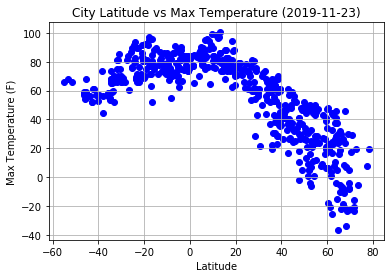

In [71]:
# Build a scatter plot for each data type

from datetime import date    
today = date.today().isoformat()

plt.scatter(cities_df["Lat"], cities_df["Max Temp"], marker="o", color = 'blue')

# # Incorporate the other graph properties
plt.title(f"City Latitude vs Max Temperature ({today})") 
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.yticks(np.arange(-40, 120, 20))
plt.grid(True)

# # Save the figure
plt.savefig("LatvsTemp.png")

#### Latitude vs. Humidity Plot

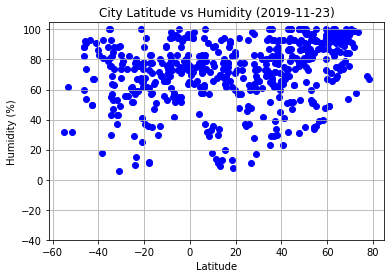

In [72]:
# Build a scatter plot for each data type
plt.scatter(cities_df["Lat"], cities_df["Humidity"], marker="o", color = 'blue')

# # Incorporate the other graph properties
plt.title(f"City Latitude vs Humidity ({today})") 
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.yticks(np.arange(-40, 120, 20))
plt.grid(True)

# # Save the figure
plt.savefig("LatvsHumidity.png")

#### Latitude vs. Cloudiness Plot

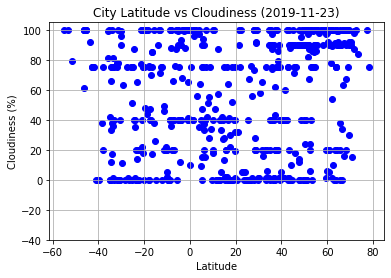

In [73]:
# Build a scatter plot for each data type
plt.scatter(cities_df["Lat"], cities_df["Cloudiness"], marker="o", color = 'blue')

# # Incorporate the other graph properties
plt.title(f"City Latitude vs Cloudiness ({today})") 
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.yticks(np.arange(-40, 120, 20))
plt.grid(True)

# # Save the figure
plt.savefig("LatvsCloudiness.png")

#### Latitude vs. Wind Speed Plot

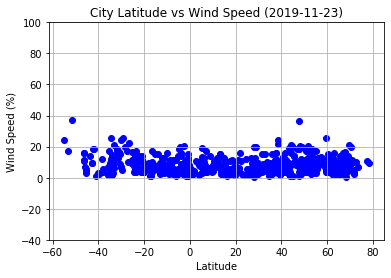

In [74]:
# Build a scatter plot for each data type
plt.scatter(cities_df["Lat"], cities_df["Wind Speed"], marker="o", color = 'blue')

# # Incorporate the other graph properties
plt.title(f"City Latitude vs Wind Speed ({today})") 
plt.ylabel("Wind Speed (%)")
plt.xlabel("Latitude")
plt.yticks(np.arange(-40, 120, 20))
plt.grid(True)

# # Save the figure
plt.savefig("LatvsWindSpeed.png")

Observations:
1. It's warmer closer to the equator, which is expected
2. Would have expected higher humidity closer to the equator, but there doesn't seem to be a coorelation
3. I would have expected Cloudiness and wind speeds charts to be similar and are not close
